In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from statannotations.Annotator import Annotator

In [2]:
train_values_df = pd.read_csv('./results/train_values_majority.csv', index_col=0)
train_values_df.head()

,text_id,label_0,label_1,epoch_no,id,text,label,agreement_factor,pred
0,3343,0.550365,0.449635,1,33TGB4G0LPBZQUDGBA15H4EWF2ATX2,Grandmother (to me):: I'm sorry. I can't make ...,1,1.000000,0
1,22718,0.560175,0.439825,1,3ULIZ0H1VAZPFRHX3LY0JF4HVNK51D,The problems start when you start to accommona...,1,1.000000,0
2,9286,0.521926,0.478074,1,3BS6ERDL931FQQXNOXS0CNJQD8GD6S,What makes an Isis joke funny? The execution.,1,0.666667,0
3,20932,0.485285,0.514715,1,3S8APUMBJXDIUMSEBU4YB3833H3FBC,The old Twitter page is for the Christopher Cl...,0,1.000000,1
4,22242,0.586726,0.413274,1,3TX9T2ZCB9VGN6HP7XU11916POSWZC,Did you hear about the Muslim who tried to hid...,1,1.000000,0


In [3]:
len(train_values_df['text_id'].unique())

27231

In [4]:
def get_confidence(label, label_0_mean, label_1_mean):
    if label == 0:
        return label_0_mean
    else:
        return label_1_mean

def get_variability(label, label_0_std, label_1_std):
    if label == 0:
        return label_0_std
    else: return label_1_std

def get_correctness(label, label_0_last, label_1_last):
    if label == 0:
        return label_0_last
    else:
        return label_1_last

In [5]:
metrics = ['mean', 'std', 'last']
def build_cartography_df(train_values_df):
    agg_df = train_values_df.sort_values(['epoch_no']).groupby('text_id', as_index=False).agg({'text': 'first', 'label_0': metrics, 'label_1': metrics, 'label': 'first', 'pred': 'last', 'agreement_factor': 'first', 'id':'first'})
    agg_df.columns = ['text_id', 'text', 'label_0_mean', 'label_0_std', 'label_0_last', 'label_1_mean', 'label_1_std', 'label_1_last', 'label', 'pred', 'agreement_factor', 'comment_id']

    agg_df['confidence'] = agg_df.apply(lambda row: get_confidence(row.label, row.label_0_mean, row.label_1_mean), axis=1)
    agg_df['variability'] = agg_df.apply(lambda row: get_variability(row.label, row.label_0_std, row.label_1_std), axis=1)
    agg_df['correctness'] = agg_df.apply(lambda row: get_correctness(row.label, row.label_0_last, row.label_1_last), axis=1)
    agg_df['is_correct'] = np.where((agg_df['label'] == agg_df['pred']), True, False)

    return agg_df

In [6]:
cartography_df = build_cartography_df(train_values_df)
cartography_df.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,pred,agreement_factor,comment_id,confidence,variability,correctness,is_correct
0,0,what do you call a high person with downs synd...,0.051867,0.023077,0.022180,0.948133,0.023077,0.977820,1,1,1.000000,301KG0KX9CF8K5JONRZNDVHCKE12H0,0.948133,0.023077,0.977820,True
1,1,what do you call a black jew ? the one who sur...,0.017122,0.005938,0.014375,0.982878,0.005938,0.985625,0,1,1.000000,301KG0KX9CF8K5JONRZNDVHCKNQ2H7,0.017122,0.005938,0.014375,False
2,2,RT @falIngforlou: i fucking nut everytime i he...,0.952853,0.079464,0.994163,0.047147,0.079464,0.005837,0,0,1.000000,301KG0KX9CF8K5JONRZNDVHCPOAH2D,0.952853,0.079464,0.994163,True
3,3,what do you call a bunch of cripples in a hot ...,0.016010,0.012501,0.010012,0.983990,0.012501,0.989988,1,1,0.750000,301KG0KX9CF8K5JONRZNDVHCPOBH2E,0.983990,0.012501,0.989988,True
4,4,Penis Hehe wieners,0.863482,0.203993,0.990182,0.136518,0.203993,0.009818,0,0,0.666667,301KG0KX9CF8K5JONRZNDVHCPP82HY,0.863482,0.203993,0.990182,True


In [7]:
cartography_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27231 entries, 0 to 27230
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   text_id           27231 non-null  int64  
 1   text              27231 non-null  object 
 2   label_0_mean      27231 non-null  float64
 3   label_0_std       27231 non-null  float64
 4   label_0_last      27231 non-null  float64
 5   label_1_mean      27231 non-null  float64
 6   label_1_std       27231 non-null  float64
 7   label_1_last      27231 non-null  float64
 8   label             27231 non-null  int64  
 9   pred              27231 non-null  int64  
 10  agreement_factor  27231 non-null  float64
 11  comment_id        27231 non-null  object 
 12  confidence        27231 non-null  float64
 13  variability       27231 non-null  float64
 14  correctness       27231 non-null  float64
 15  is_correct        27231 non-null  bool   
dtypes: bool(1), float64(10), int64(3), objec

In [8]:
len(cartography_df['text_id'].unique())

27231

In [9]:
len(cartography_df)

27231

In [10]:
def round_agree_factor(agr_factor):
    if agr_factor <= 0.6:
        return 0.6
    elif agr_factor <= 0.8:
        return 0.8
    return 1.0

cartography_df['agreement_factor_rd'] = cartography_df['agreement_factor'].apply(lambda x: round_agree_factor(x))
cartography_df.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,pred,agreement_factor,comment_id,confidence,variability,correctness,is_correct,agreement_factor_rd
0,0,what do you call a high person with downs synd...,0.051867,0.023077,0.022180,0.948133,0.023077,0.977820,1,1,1.000000,301KG0KX9CF8K5JONRZNDVHCKE12H0,0.948133,0.023077,0.977820,True,1.0
1,1,what do you call a black jew ? the one who sur...,0.017122,0.005938,0.014375,0.982878,0.005938,0.985625,0,1,1.000000,301KG0KX9CF8K5JONRZNDVHCKNQ2H7,0.017122,0.005938,0.014375,False,1.0
2,2,RT @falIngforlou: i fucking nut everytime i he...,0.952853,0.079464,0.994163,0.047147,0.079464,0.005837,0,0,1.000000,301KG0KX9CF8K5JONRZNDVHCPOAH2D,0.952853,0.079464,0.994163,True,1.0
3,3,what do you call a bunch of cripples in a hot ...,0.016010,0.012501,0.010012,0.983990,0.012501,0.989988,1,1,0.750000,301KG0KX9CF8K5JONRZNDVHCPOBH2E,0.983990,0.012501,0.989988,True,0.8
4,4,Penis Hehe wieners,0.863482,0.203993,0.990182,0.136518,0.203993,0.009818,0,0,0.666667,301KG0KX9CF8K5JONRZNDVHCPP82HY,0.863482,0.203993,0.990182,True,0.8


In [11]:
cartography_df.to_csv('./results/cartography_majority.csv', index=False)

### Useless after this

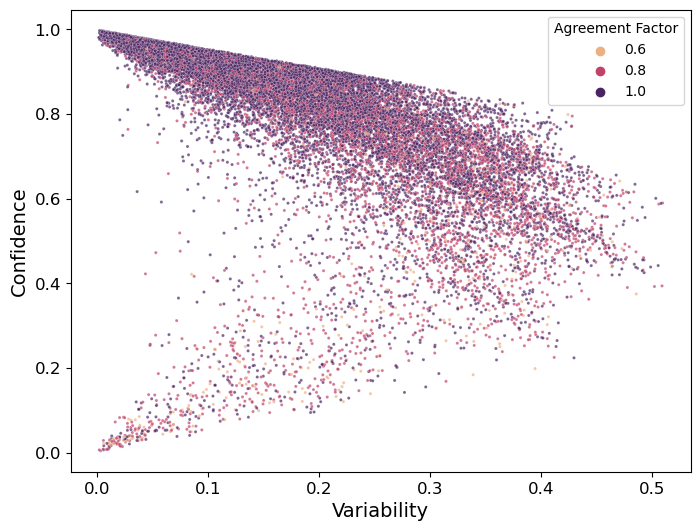

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="variability", y="confidence", hue='agreement_factor_rd', palette='flare', alpha=0.7, s=5)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.legend(title='Agreement Factor')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/majority/conf_vs_var_color_agreement_factor.png", dpi=600, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.6 vs. 0.8: Mann-Whitney-Wilcoxon test two-sided, P_val:7.194e-72 U_stat=5.585e+05
0.8 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=3.563e+07
0.6 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.595e-165 U_stat=8.123e+05


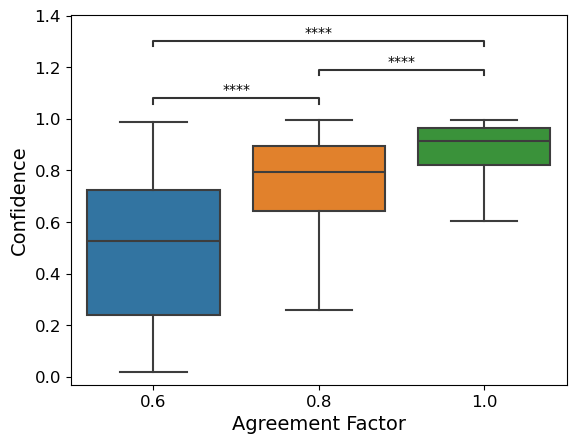

In [24]:
ax = sns.boxplot(data=cartography_df, x="agreement_factor_rd", y="confidence", showfliers=False)

pairs=[(0.6, 0.8), (0.8, 1.0), (0.6, 1.0)]

annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor_rd", y="confidence")
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/majority/agr_factor_vs_conf.png", dpi=600, bbox_inches='tight')



In [14]:
cartography_df['label_text'] = cartography_df['label'].map({0: 'not offensive', 1: 'offensive'})

In [15]:
len(cartography_df)

27231

<Axes: xlabel='agreement_factor_rd', ylabel='count'>

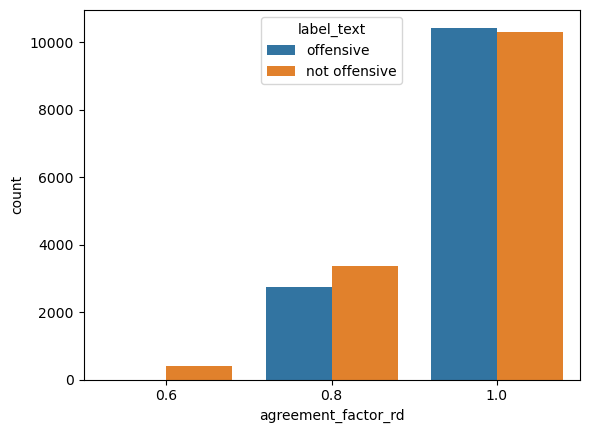

In [16]:
sns.countplot(data=cartography_df, x="agreement_factor_rd", hue='label_text')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.8_1 vs. 1.0_1: Mann-Whitney-Wilcoxon test two-sided, P_val:2.538e-204 U_stat=8.864e+06
0.6_0 vs. 1.0_0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.980e-176 U_stat=3.353e+05


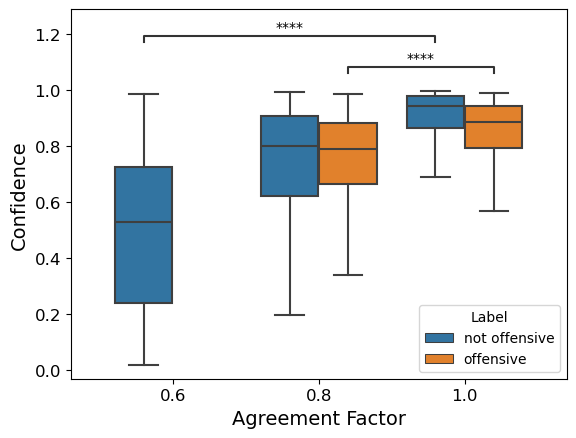

In [38]:
ax = sns.boxplot(data=cartography_df.sample(frac=1), x="agreement_factor_rd", y="confidence", hue='label_text', showfliers=False)

pairs=[ ((0.6, 0), (1.0, 0)), ((0.8, 1), (1.0, 1))]


annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor_rd", y="confidence", hue='label')
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Label')
plt.savefig("./plots/majority/agr_factor_vs_conf_hue.png", dpi=600, bbox_inches='tight')

In [18]:
cartography_df['label'].value_counts()

0    14063
1    13168
Name: label, dtype: int64

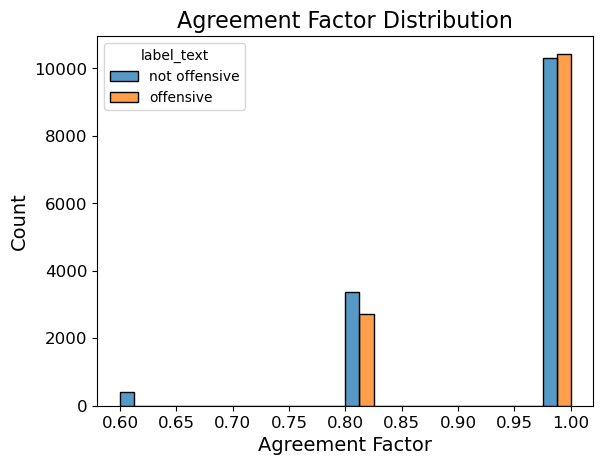

In [40]:
# sns.histplot(data=cartography_df, x="agreement_factor",hue='label')
sns.histplot(data=cartography_df.sample(frac=1), x="agreement_factor_rd", hue='label_text', multiple='dodge')

plt.title("Agreement Factor Distribution", fontsize=16)
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/majority/agr_factor_hist.png", dpi=600, bbox_inches='tight')

In [21]:
def round_correctness(value):
    return round(value*5)/5
cartography_df['correctness_rd'] = cartography_df['correctness'].apply(lambda x: round_correctness(x))

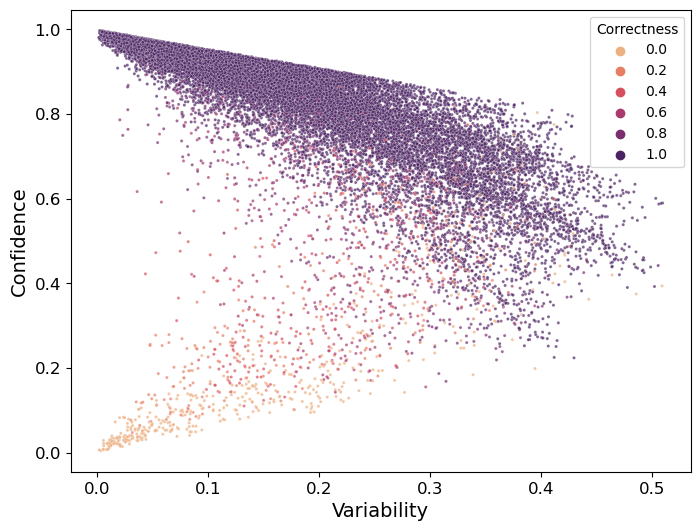

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="variability", y="confidence", hue='correctness_rd', palette='flare', alpha=0.7, s=5)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Correctness', loc='upper right')
plt.savefig("./plots/majority/conf_vs_var_color_correctness.png", dpi=600, bbox_inches='tight')

In [23]:
from scipy.stats import pearsonr

pearsonr(cartography_df['confidence'], cartography_df['agreement_factor_rd'])

PearsonRResult(statistic=0.37341723730786924, pvalue=0.0)

In [13]:
from sklearn.metrics import f1_score, classification_report

In [14]:
print(classification_report(cartography_df['label'], cartography_df['pred']))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4630
           1       0.88      0.87      0.88      1962

    accuracy                           0.93      6592
   macro avg       0.91      0.91      0.91      6592
weighted avg       0.93      0.93      0.93      6592



In [15]:
print(f1_score(cartography_df['label'], cartography_df['pred']))

0.8756066411238825
